### 20) Write a program to implement linear regression using python.

GRADIENT DESCENT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#N_ITERATIONS AND LEARNING RATE
iterations=1000
alpha=0.01

In [3]:
#DATA
m=100
x=np.linspace(0,5,m)
y=20*x+10+np.random.normal(0,2.5,np.size(x))

Text(0, 0.5, 'Y')

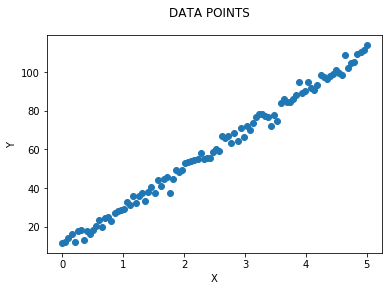

In [4]:
#DATA POINTS PLOT
fig = plt.figure()
plt.plot(x,y,'o')
fig.suptitle('DATA POINTS')
plt.xlabel('X')
plt.ylabel('Y')

In [5]:
#INITIALIZING WEIGHTS
w0 = np.random.random() #BIAS
w = np.random.rand(x[0].size)

In [6]:
#COST FUNCTION(LOSS)
def J(yh, y):
    return 0.5/m*np.sum((y-yh)**2)

#FUNCTION FOR UPDATING WEIGHTS
def updateW(w0,w,yh,y,Xi,alpha):
    dw0= -alpha*np.sum(yh-y)/m
    w0=w0+dw0
    dw = -alpha*np.sum(np.dot((yh - y), Xi))/m
    w = w+dw
    return w0,w

#ROOT MEAN SQUARE ERROR
def rmse(yh, y):
    return np.sqrt(((yh - y) ** 2).mean())

In [7]:
#FINDING WEIGHTS USING GD
costs = []
for i in range(iterations):
    yh=w0+w*x
    cost = J(yh,y)
    w0,w=updateW(w0,w,yh,y,x,alpha)
    costs.append(cost)

Text(0, 0.5, '# Iteration')

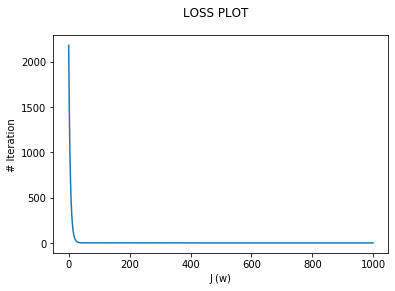

In [8]:
#LOSS PLOT
fig = plt.figure()
plt.plot(costs)
fig.suptitle('LOSS PLOT')
plt.xlabel('J (w)')
plt.ylabel('# Iteration')

Text(0, 0.5, 'Y')

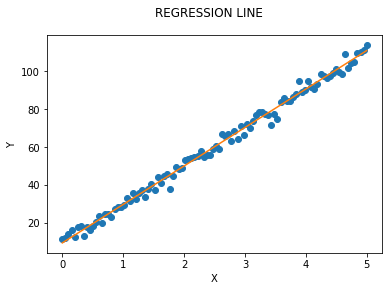

In [9]:
#REGRESSION LINE PLOT
fig = plt.figure()
plt.plot(x,y,'o',x,yh)
fig.suptitle('REGRESSION LINE')
plt.xlabel('X')
plt.ylabel('Y')

In [10]:
#RMSE
rmseGD=rmse(yh,y)
rmseGD

2.4994265555063975

LEAST SQUARES

In [11]:
#CALC MEAN
x_mean=x.mean()
y_mean=y.mean()

In [12]:
#FIND WEIGHTS
sxy=(x*y).sum()
sxym=(x.sum()*y.sum())/m
sxx=(x*x).sum()
sxxm=(x.sum()*x.sum())/m
w=(sxy-sxym)/(sxx-sxxm)
w0=y_mean-w*x_mean

In [13]:
#YHAT
yh=w0+w*x

Text(0, 0.5, 'Y')

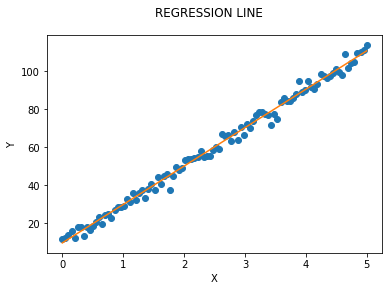

In [14]:
#PLOT
fig = plt.figure()
plt.plot(x,y,'o',x,yh)
fig.suptitle('REGRESSION LINE')
plt.xlabel('X')
plt.ylabel('Y')

In [15]:
#RMSE
rmseLS=rmse(yh,y)
rmseLS

2.495619883749647

SKLEARN LINEAR REGRESSION

In [4]:
from sklearn.linear_model import LinearRegression

In [17]:
LR = LinearRegression()
x=x.reshape(-1,1)
LR.fit(x,y)
yh = LR.predict(x)

Text(0, 0.5, 'Y')

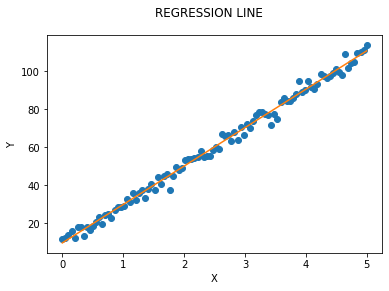

In [18]:
fig = plt.figure()
plt.plot(x,y,'o',x,yh)
fig.suptitle('REGRESSION LINE')
plt.xlabel('X')
plt.ylabel('Y')

In [19]:
rmseSK=rmse(yh,y)
rmseSK

2.495619883749647

COMPARE RMSE

In [20]:
print('RMSE GD = {}'.format(rmseGD))
print('RMSE LS = {}'.format(rmseLS))
print('RMSE SKLearn = {}'.format(rmseLS))

RMSE GD = 2.4994265555063975
RMSE LS = 2.495619883749647
RMSE SKLearn = 2.495619883749647


In [3]:
m=100
x1=np.linspace(0,5,m)
x2=np.linspace(0,2,m)
y=20*x1+60*x2+10+np.random.normal(0,2.5,np.size(x1))

In [5]:
import pandas as pd
LR = LinearRegression()
df = pd.DataFrame({'X1': x1, 'X2': x2})

In [6]:
df

,X1,X2
0,0.000000,0.000000
1,0.050505,0.020202
2,0.101010,0.040404
3,0.151515,0.060606
4,0.202020,0.080808
...,...,...
95,4.797980,1.919192
96,4.848485,1.939394
97,4.898990,1.959596
98,4.949495,1.979798


In [8]:
LR.fit(df,y)
yh = LR.predict(df)

In [16]:
LR.coef_

array([37.97600131, 15.19040053])